# Case Study on Regression

Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car=pd.read_csv(r"C:\Users\hp\Desktop\car_age_price (1).csv")
car

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
car.shape

(112, 2)

In [4]:
car.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
car['Year'].nunique()

8

Editing Dataset

In [6]:
car=car.drop_duplicates()

In [7]:
car.shape

(58, 2)

In [8]:
car=car.sort_values(by='Year')

In [9]:
car=car.reset_index()  

In [10]:
car=car.drop(['index'],axis=1)
car.head(7)

,Year,Price
0,2013,320000
1,2013,345000
2,2013,325000
3,2014,341000
4,2014,400000
5,2014,450000
6,2014,390000


Linear Regression

In [11]:
x=car['Year'].values.reshape(-1,1)
y=car['Price'].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_test

array([[320000],
       [450000],
       [509999],
       [350000],
       [550000],
       [755000],
       [525000],
       [396000],
       [465000],
       [300000],
       [500000],
       [341000]], dtype=int64)

In [13]:
accuracy=lr.score(x_test,y_test)
"Accuracy: {}%".format(int(round(accuracy*100)))

'Accuracy: 61%'

In [14]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
print ('R squared value is:',R2)

R squared value is: 0.6133891606765834


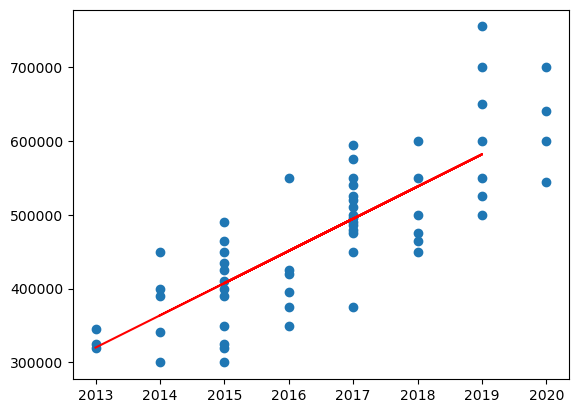

In [15]:
#Fitting best line
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')
plt.show()

In [16]:
print(lr.intercept_) #intercept

[-87496184.80351266]


In [17]:
print(lr.coef_) #slope

[[43624.60922064]]


In [18]:
best_fit="Price =" + str(lr.coef_) + "Year+" + str(lr.intercept_)
print('Linear Relationship between Year and Car Price:',best_fit)

Linear Relationship between Year and Car Price: Price =[[43624.60922064]]Year+[-87496184.80351266]


In [19]:
print(lr.predict([[2022]]))

[[712775.04061471]]


The possible price of a 2022 model second-hand Hyundai grand i10 predicted by our model is around 7 lakhs.

Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
x_pred_lasso_test=lasso.predict(x_test)
r2_lasso=r2_score(y_test,x_pred_lasso_test)
print ('R squared value is:',r2_lasso)

R squared value is: 0.6133882271608141


Since R square value of Linear Regression is greater than Lasso's we conclude that Linear Regression is better. 